In [1]:
!ls

MELD_example.ipynb


In [9]:
# %load ../meld/test/test_meld.py
import numpy as np
from meld.meld import MELD

np.random.RandomState(seed = 42)

# test some MELD
n_jobs = -1
verbose = 10

# generate some fake data
nobs = 100
nsubj = 10
nfeat = (10, 30)
nperms = 200
use_ranks = False
smoothed = False
memmap = False

s = np.concatenate([np.array(['subj%02d' % i] * nobs)
                    for i in range(nsubj)])
beh = np.concatenate([np.array([1] * (nobs // 2) + [0]*(nobs // 2))
                      for i in range(nsubj)])

# observations (data frame)
ind_data = np.rec.fromarrays((np.zeros(len(s)),
                              beh,
                              np.random.rand(len(s)), s),
                             names='val,beh,beh2,subj')

# data with observations in first dimension and features on the remaining
dep_data = np.random.randn(len(s), *nfeat)
print('Data shape:', dep_data.shape)

# make a mask
dep_mask = np.ones(nfeat, dtype=np.bool)
dep_mask[:2, :] = False
dep_mask[:, :2] = False

# now with signal
# add in some signal
dep_data_s = dep_data.copy()
for i in range(0, 20, 2):
    for j in range(2):
        dep_data_s[:, 4, i+j] += (ind_data['beh'] * (i+1)*50.)
        dep_data_s[:, 5, i+j] += (ind_data['beh'] * (i+1)*50.)

# smooth the data
if smoothed:
    import scipy.ndimage
    dep_data = scipy.ndimage.gaussian_filter(dep_data, [0, 1, 1])
    dep_data_s = scipy.ndimage.gaussian_filter(dep_data_s, [0, 1, 1])

print("Starting MELD test")
print("beh has signal, beh2 does not")
me_s = MELD('val ~ beh+beh2', '(1|subj)', 'subj',
            dep_data_s, ind_data, factors={'subj': None},
            use_ranks=use_ranks,
            dep_mask=dep_mask,
            feat_nboot=1000, feat_thresh=0.05,
            do_tfce=True,
            connectivity=None, shape=None,
            dt=.01, E=2/3., H=2.0,
            n_jobs=n_jobs, verbose=verbose,
            memmap=memmap,
            # lmer_opts={'control':lme4.lmerControl(optimizer="nloptwrap",
            #                                       #optimizer="Nelder_Mead",
            #                                       optCtrl=r['list'](maxfun=100000))
            #        }
           )
me_s.run_perms(nperms)
pfts = me_s.p_features
print("Number of signifcant features:", [(n, (pfts[n] <= .05).sum())
                                         for n in pfts.dtype.names])

Data shape: (1000, 10, 30)
Starting MELD test
beh has signal, beh2 does not
Initializing...Done (0.43 sec)
Processing actual data...

KeyboardInterrupt: 

In [4]:
pfts = me_s.p_features
print("Number of signifcant features:", [(n, (pfts[n] <= .05).sum())
                                             for n in pfts.dtype.names])

Number of signifcant features: [('beh', 42), ('beh2', 0)]


In [6]:
np.array(np.where(me_s.t_features['beh'] > 1000000))

array([[ 4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
         5,  5],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19]])

In [7]:
sig_location = np.array((np.array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
                                       4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5,
                                       5, 5, 5, 5, 5, 5, 5, 5, 5, 5]),
                             np.array([2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
                                       12, 13, 14, 15, 16, 17, 18, 19,  2,  3,
                                       4,  5,  6,  7,  8,  9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19])))

In [8]:
assert (np.array(np.where(me_s.t_features['beh'] > 1000000)) == sig_location).all()


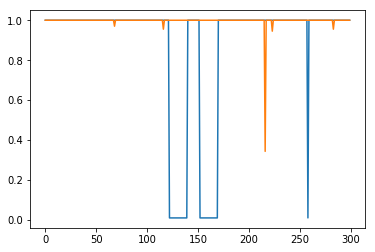

In [32]:
plt.plot(np.array(me_s.p_features['beh']).flatten())
plt.plot(np.array(me_s.p_features['beh2']).flatten())

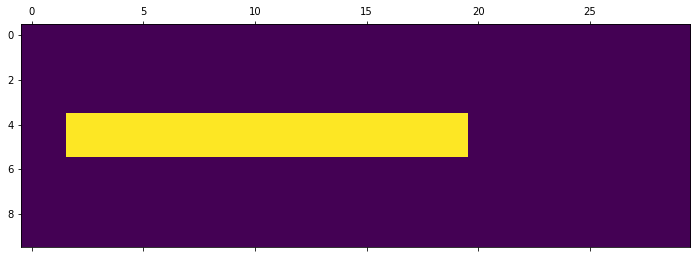

In [41]:
plt.matshow(me_s.t_features['beh'] >1000000)

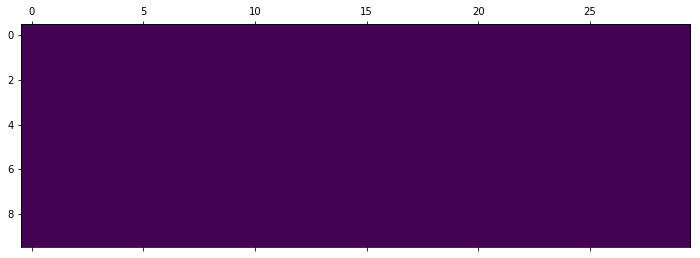

In [40]:
plt.matshow(me_s.t_features['beh2'] >100000)

In [55]:
np.array((np.array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]),
 np.array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19])))

array([[ 4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
         5,  5],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19]])

In [56]:
sig_location = np.array((np.array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]),
 np.array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19])))
assert (np.array(np.where(me_s.t_features['beh'] >1000000)) == sig_location).all()

In [57]:
assert ((me_s.t_features['beh2'] >100000)==0).all()

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,